In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report 

df=pd.read_csv('adult.data.txt')

df.head()

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [2]:
df = df.replace(' ?',np.nan)
df = df.dropna(how = 'any')
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [3]:
df.head()
df.columns

Index(['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married',
       'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40',
       'United-States', '<=50K'],
      dtype='object')

In [6]:
raw_X = df[df.columns[0:14]]
y = y=df.iloc[:,-1].values

In [7]:
X = pd.concat([pd.get_dummies(raw_X[['State-gov','Bachelors','Never-married','Adm-clerical','Not-in-family','\
White','Male','United-States']]),raw_X[['39','77516','13','2174','0','40']]],ignore_index=True, axis = 1)

In [8]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=1/3)

In [9]:
from sklearn.metrics import accuracy_score
lrn = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced')

lrn.fit(X_train, y_train)
y_pred = lrn.predict(X_test)

##########Results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
LRA = accuracy_score(y_test, y_pred)
print("The Accuracy for Logistic Regression is {}".format(LRA))

[[5235 2317]
 [ 484 2018]]
             precision    recall  f1-score   support

      <=50K       0.92      0.69      0.79      7552
       >50K       0.47      0.81      0.59      2502

avg / total       0.80      0.72      0.74     10054

The Accuracy for Logistic Regression is 0.7214044161527751


In [9]:
############################################## KNN ###############
from sklearn import preprocessing, cross_validation, neighbors
from sklearn.metrics import accuracy_score

clf = neighbors.KNeighborsClassifier()

clf.fit(X_train, y_train)

knnpre = clf.predict(X_test)

##########Results

print(confusion_matrix(y_test,knnpre))
print(classification_report(y_test,knnpre))
KKNA = accuracy_score(y_test, knnpre)
print("The Accuracy for KNN is {}".format(KKNA))

[[6914  622]
 [1719  799]]
             precision    recall  f1-score   support

      <=50K       0.80      0.92      0.86      7536
       >50K       0.56      0.32      0.41      2518

avg / total       0.74      0.77      0.74     10054

The Accuracy for KNN is 0.767157350308335


In [10]:
################################ Decision tree ###########################################

from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn import metrics

clf_tree = DecisionTreeClassifier( max_depth = 4 )

clf_tree.fit( X_train, y_train )
tree_predict = clf_tree.predict( X_test )
metrics.accuracy_score( y_test, tree_predict )

print(confusion_matrix(y_test,tree_predict))
print(classification_report(y_test,tree_predict))
DTA = accuracy_score(y_test, tree_predict)
print("The Accuracy for Decision Tree Model is {}".format(DTA))
#The accuracy for this model can be viewed at : https://tinyurl.com/y9uzgtlc

[[7160  376]
 [1217 1301]]
             precision    recall  f1-score   support

      <=50K       0.85      0.95      0.90      7536
       >50K       0.78      0.52      0.62      2518

avg / total       0.83      0.84      0.83     10054

The Accuracy for Decision Tree Model is 0.841555599761289


In [ ]:
################################ SVM #####################################

from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

svc = SVC(C = 1.0, kernel = "linear" )
svc.fit( X_train, y_train )
svc_predict = svc.predict( X_test )

print(confusion_matrix(y_test,svc_predict))
print(classification_report(y_test,svc_predict))
SVMA = accuracy_score(y_test, svc_predict)
print("The Accuracy for SVM is {}".format(SVMA))

In [12]:
####################### NAIVE  #####################################
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

#Predict Output 
naive_pre= model.predict(X_test)
print (naive_pre)
##result
print(confusion_matrix(y_test,naive_pre))
print(classification_report(y_test,naive_pre))
NBA = accuracy_score(y_test, naive_pre)
print("The Accuracy for NB is {}".format(NBA))

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']
[[7170  382]
 [1695  807]]
             precision    recall  f1-score   support

      <=50K       0.81      0.95      0.87      7552
       >50K       0.68      0.32      0.44      2502

avg / total       0.78      0.79      0.76     10054

The Accuracy for NB is 0.7934155559976129


Best: -0.286349 using {'learning_rate': 0.1, 'n_estimators': 500}
-0.687878 (0.000103) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.682713 (0.000205) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-0.677649 (0.000305) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-0.672683 (0.000403) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-0.667811 (0.000498) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-0.644780 (0.000953) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.604642 (0.001773) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.571018 (0.002496) with: {'learning_rate': 0.001, 'n_estimators': 300}
-0.542558 (0.003115) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.518267 (0.003639) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.437157 (0.005589) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.368791 (0.006895) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.341601 (0.008039) with: {'learning_rate': 0.01, 'n_e

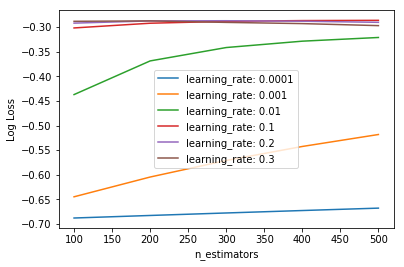

In [13]:
############## This xgboost code is where I experiment which learning rate and what number of estimators are BEST

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
import numpy
from matplotlib import pyplot
from pandas import read_csv
# grid search
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_learning_rate.png')

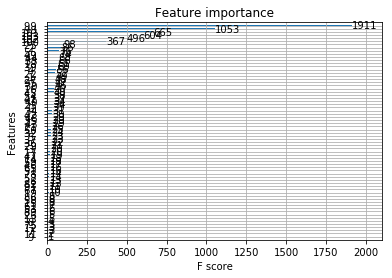

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


training set auc: 0.8711955440620649
test set auc: 0.8711955440620649
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 4, 'missing': None, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}
The Accuracy  is 0.8711955440620649


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [10]:
############# XGboost - Picking the best values for learning rate and estimators  

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=5,
                           min_child_weight=4
                           )
final_m=model.fit(X_train, y_train)
xgb.plot_importance(final_m)
plt.show()
predictions = model.predict(X_test)
print("training set auc:",accuracy_score(y_test, predictions))
predictions = model.predict(X_test)
print("test set auc:",accuracy_score(y_test, predictions))
print(model.get_params())

XGBA = accuracy_score(y_test, predictions)
print("The Accuracy  is {}".format(XGBA))